<a href="https://colab.research.google.com/github/brunolunarj/Sprint2---ML/blob/main/MVPML_brunoluna.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MVP PUCRIO - Sprint 2 - Machine Learning**

---



**Por Bruno de Amorim Luna**

## 1 - Definição do Problema



---




O Sistema Único de Saúde (**SUS**) é o sistema público de saúde brasileiro criado pela Constituição Federal de 1988. Entre os países com mais de 200 milhões de habitantes, o Brasil é o único que possui um sistema de saúde pública universal totalmente financiado pelo Estado.<br>
Os dados aqui analisados foram retirados do **Portal do Datasus**, Departamento de Informática do SUS, onde podemos encontrar dados de: indicadores de saúde, assistência à saúde, informações epidemiológicas e de morbidade, informações sobre a rede de assistência à saúde, estatísticas vitais, informações demográficas e socioeconômicas.
(https://datasus.saude.gov.br/transferencia-de-arquivos/).<br>
A Psiquiatria emerge nos anos de 1980, nos Estados Unidos, com a publicação do DSM-III (Manual de Diagnóstico e Estatístico de Transtornos Mentais). Este tem a proposta de apresentar descrições objetivas dos, então, chamados “**distúrbios mentais**” a partir de um critério classificatório que não inclui discussões acerca da etiologia destes “distúrbios”. Usado por psicólogos, fonoaudiólogos, médicos e terapeutas ocupacionais. A versão atualizada (DSM-5) saiu em maio de 2013 e fir revisado em 2000.
<br>
Todo caso de sofrimento emocional em suas diversas formas de manifestação tais como: choro fácil, tristeza, medo excessivo, doenças psicossomáticas, agitação, irritação, nervosismo, ansiedade, taquicardia, sudorese, insegurança, entre outros sintomas que podem indicar o desenvolvimento ou agravo de transtornos mentais utilizando os **CID - 10**: Transtornos mentais e comportamentais (F00 a F99), Alcoolismo (Y90 e Y91), Síndrome de Burnout (Z73.0), Sintomas e sinais relativos à cognição, à percepção, ao estado emocional e ao comportamento (R40 a R46), Pessoas com riscos potenciais à saúde relacionados com circunstâncias socioeconômicas e psicossociais (Z55 a Z65), Circunstância relativa às condições de trabalho (Y96) e Lesão autoprovocada intencionalmente (X60 a X84).<br>
Realizaremos a análise dos dados de “**distúrbios mentais**” retirados do DATASUS referentes ao estado do **Rio de Janeiro** no ano de **2022** para verificar se através dos dados disponíveis da população, podemos estimar o possível diagnóstico do paciente através da **Classificação Internacional de Doenças (CID)**.



## 2 - Importação dos pacotes e coleta dos dados
---


**Datasus - Distúrbios Mentais do Rio de Janeiro de 2022**


In [2]:
# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Imports necessários
import pandas as pd # Pandas para manipulação e análise de dados
import numpy as np # Trabalhar com cálculos numéricos e arrays
import matplotlib.pyplot as plt # Gráficos com Matplotlib
import seaborn as sns # Gráficos com Seaborn
from sklearn.preprocessing import Normalizer # Importando o Normalizer
#from sklearn.preprocessing import MinMaxScaler # normalização
from sklearn.preprocessing import StandardScaler # padronização
#from sklearn.preprocessing import OrdinalEncoder # ordinal encoding
#from sklearn.preprocessing import LabelEncoder  # LabelEncoder
#from sklearn.preprocessing import OneHotEncoder  # one-hot encoding e dummy encoding
from sklearn.model_selection import train_test_split # para particionar em bases de treino e teste (holdout)
from sklearn.model_selection import KFold # para preparar os folds da validação cruzada
from sklearn.model_selection import cross_val_score # para executar a validação cruzada
from sklearn.neighbors import KNeighborsClassifier # algoritmo KNN de Classificação
from sklearn.naive_bayes import GaussianNB # algoritmo Naive Bayes Gaussiano
from sklearn.ensemble import RandomForestClassifier # algoritmo RF de Classificação
from sklearn.ensemble import ExtraTreesClassifier #ET de Classificação
#from sklearn.svm import SVR # algoritmo SVM
#from sklearn.tree import DecisionTreeRegressor # algoritmo Árvore de Regressão
#from sklearn.linear_model import LinearRegression # algoritmo Regressão Linear
#from sklearn.neighbors import KNeighborsRegressor # algoritmo KNN
#from sklearn.naive_bayes import MultinomialNB # algoritmo NB Multimodal
#from sklearn.ensemble import RandomForestRegressor # algoritmo RF de Regressão
#from sklearn.ensemble import ExtraTreesRegressor # algoritmo ET de Regressão
from sklearn.metrics import mean_squared_error # métrica de avaliação MSE
from sklearn.metrics import accuracy_score # métrica de acurácia
import missingno as ms # para tratamento de missings

df = pd.read_excel('https://github.com/brunolunarj/Sprint2---ML/blob/b087666dbdd04b37b40b33182582a06ace8da8ba/PSRJ2022.xlsx?raw=true')
display(df)

,DT_ATEND,MUNPAC,NACION_PAC,DTNASC,IDADEPAC,SEXOPAC,RACACOR,PA_PROC_ID,SIT_RUA,TP_DROGA,LOC_REALIZ,PERMANEN,CIDPRI,CIDASSOC
0,202201,330130,1,19720807,45,F,4,301080208,N,A,CAPS,31.0,F10,NaN
1,202201,330130,1,19820906,33,F,2,301080208,N,NaN,CAPS,31.0,F99,NaN
2,202201,330130,1,19710226,46,M,4,301080208,N,A,CAPS,31.0,F10,NaN
3,202201,330130,1,19710226,46,M,4,301080208,N,A,CAPS,NaN,F10,NaN
4,202201,330130,1,19720807,45,F,4,301080208,N,A,CAPS,NaN,F10,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
756541,202212,330205,1,19640816,41,M,1,301080194,N,NaN,CAPS,31.0,F105,NaN
756542,202212,330205,1,19600121,52,M,3,301080194,N,NaN,CAPS,31.0,F200,NaN
756543,202212,330205,1,19711127,32,F,1,301080194,N,NaN,CAPS,31.0,F200,NaN
756544,202212,330205,1,19670530,38,F,3,301080194,N,NaN,CAPS,31.0,F200,NaN


In [3]:
#df.rename(columns={'MUNPAC':'MUNICIPIO','NACION_PAC': 'NACION','IDADEPAC': 'IDADE','SEXOPAC': 'SEXO','PA_PROC_ID': 'COD_PROC' })

**Dicionário de Dados - Atributos**
>**0   DT_ATEND:** Mês do Atendimento (AAAAMM) <br>
>**1   MUNPAC:** Unidade da Federação + município do município de residência do paciente <br>
>**2   NACION_PAC:** Nacionalidade do paciente <br>
>**3   DTNASC:** Data de nascimento do paciente <br>
>**4   IDADEPAC:** Idade do paciente <br>
>**5   SEXOPAC:** Sexo do paciente: M - Masculino, F - Feminino  <br>
>**6   RACACOR:** Raça/Cor do paciente: 01 — Branca, 02 — Preta, 03 — Parda, 04 — Amarela, 05 — Indígena, 99 — Sem informação <br>
>**7   PA_PROC_ID:** Código de Procedimento Ambulatorial <br>
>**8   SIT_RUA:** Situação de Rua (S - SIM, N — NÃO) <br>
>**9   TP_DROGA:** TIPO DE DROGA (A — Álcool, C — Crack, O — Outros, N — Nenhum, AC — Álcool e Crack, AO — Álcool e Outros, CO — Crack e Outros, ACO — Álcool, Crack e Outros) <br>
>**10  LOC_REALIZ:** Local de Realização (C — CAPS, T — Território)<br>
>**10  PERMANEN:** Dias de permanência no Atendimento<br>
>**10  CIDPRI:** CID Principal<br>
>**10  CIDASSOC:** CID Causas Associadas<br>

## 3 - Análise dos Dados


###3.1 Estatísticas Descritivas
Vamos examinar as dimensões do dataset, suas informações e alguns exemplos de linhas.

In [4]:
#Verificando o tamanho do dataset
df.shape

(756546, 14)

O Dataset contém 756546 tuplas com 14 atributos. Abaixo verificaremos as informações das colunas e o tipo de dado de cada um.

In [5]:
#Verificando as informações do DF
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756546 entries, 0 to 756545
Data columns (total 14 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   DT_ATEND    756546 non-null  int64  
 1   MUNPAC      756546 non-null  int64  
 2   NACION_PAC  756546 non-null  int64  
 3   DTNASC      756546 non-null  int64  
 4   IDADEPAC    756546 non-null  int64  
 5   SEXOPAC     756546 non-null  object 
 6   RACACOR     756546 non-null  int64  
 7   PA_PROC_ID  756546 non-null  int64  
 8   SIT_RUA     756546 non-null  object 
 9   TP_DROGA    148255 non-null  object 
 10  LOC_REALIZ  756546 non-null  object 
 11  PERMANEN    211183 non-null  float64
 12  CIDPRI      756546 non-null  object 
 13  CIDASSOC    87310 non-null   object 
dtypes: float64(1), int64(7), object(6)
memory usage: 80.8+ MB


Analisando as colunas e tipos de dados, será necessária a escolha de alguns atributos que serão objeto de pesquisa do dataset.

Abaixo iremos verificar as primeiras e ultimas linhas do dataset, para ter algum insight inicial.

In [6]:
# Mostra as 10 primeiras linhas do dataset
df.head(10)

,DT_ATEND,MUNPAC,NACION_PAC,DTNASC,IDADEPAC,SEXOPAC,RACACOR,PA_PROC_ID,SIT_RUA,TP_DROGA,LOC_REALIZ,PERMANEN,CIDPRI,CIDASSOC
0,202201,330130,1,19720807,45,F,4,301080208,N,A,CAPS,31.0,F10,NaN
1,202201,330130,1,19820906,33,F,2,301080208,N,NaN,CAPS,31.0,F99,NaN
2,202201,330130,1,19710226,46,M,4,301080208,N,A,CAPS,31.0,F10,NaN
3,202201,330130,1,19710226,46,M,4,301080208,N,A,CAPS,NaN,F10,NaN
4,202201,330130,1,19720807,45,F,4,301080208,N,A,CAPS,NaN,F10,NaN
5,202201,330130,1,19720807,45,F,4,301080208,N,A,CAPS,NaN,F10,NaN
6,202201,330130,1,19720511,45,M,1,301080208,N,NaN,CAPS,31.0,F10,NaN
7,202201,330130,1,19930118,23,M,3,301080208,N,A,CAPS,31.0,F10,NaN
8,202201,330130,1,19641109,52,F,3,301080208,N,NaN,CAPS,31.0,F205,NaN
9,202201,330130,1,19930118,23,M,3,301080208,N,A,CAPS,NaN,F10,NaN


Observando essas linhas, percebemos que temos muitos campos referentes ao Tipo de drogas, dias de permanência e CID principal são nulos, sendo necessário na fase pré-processamento eliminá-los ou preenche-los conforme a necessidade.

Será realizado um resumo estatistico do Dataframe.

In [7]:
#Descrição do estatística do Dataframe
df.describe()

,DT_ATEND,MUNPAC,NACION_PAC,DTNASC,IDADEPAC,RACACOR,PA_PROC_ID,PERMANEN
count,756546.000000,756546.000000,756546.000000,7.565460e+05,756546.000000,756546.000000,7.565460e+05,211183.000000
mean,202206.128225,330347.366463,1.015732,1.983998e+07,32.542368,37.070363,3.010802e+08,29.509506
std,8.044155,969.220336,0.367986,1.881562e+05,17.599543,46.474157,4.840888e+01,4.120341
min,202109.000000,240810.000000,1.000000,1.906051e+07,0.000000,1.000000,3.010800e+08,1.000000
25%,202204.000000,330220.000000,1.000000,1.969061e+07,18.000000,2.000000,3.010802e+08,30.000000
50%,202207.000000,330410.000000,1.000000,1.982020e+07,33.000000,3.000000,3.010802e+08,31.000000
75%,202210.000000,330455.000000,1.000000,2.001021e+07,46.000000,99.000000,3.010802e+08,31.000000
max,202212.000000,421130.000000,28.000000,2.022123e+07,99.000000,99.000000,3.010804e+08,31.000000


Vamos calcular a Moda do Dataframe.

In [8]:
#Moda do Dataframe
df.mode()

,DT_ATEND,MUNPAC,NACION_PAC,DTNASC,IDADEPAC,SEXOPAC,RACACOR,PA_PROC_ID,SIT_RUA,TP_DROGA,LOC_REALIZ,PERMANEN,CIDPRI,CIDASSOC
0,202210,330455,1,19850714,43,M,99,301080208,N,AO,CAPS,31.0,F20,F20


Podemos verificar que uma boa parte dos pacientes tem 43 anos de idade, do sexo masculino, não vive em situação de rua e/ou usa drogas como álcool e outros.

In [9]:
#Separando Dataframe por sexo com os atributos Idade, Raça e CID principal
#Filtro MASC FEM
masc = df[df.SEXOPAC == "M"]
fem =  df[df.SEXOPAC == "F"]

In [10]:
#Conta os valores iguais do atributo TIPO DE DROGA
df['TP_DROGA'].value_counts()

AO     49946
A      44822
O      40592
ACO     8268
CO      2569
C       1425
AC       443
A O      190
Name: TP_DROGA, dtype: int64

In [11]:
#Conta os CIDs principais
df['CIDPRI'].value_counts()

F20     135703
F99     133582
F200     75437
F19      58661
F102     24039
         ...  
O993         1
F812         1
F504         1
I248         1
D32          1
Name: CIDPRI, Length: 507, dtype: int64


### 3.2 Visualizações

Vamos criar uma visualização da quantidade de casos atendidos por mês

Text(0.5, 0, 'Mês de atendimentos ')

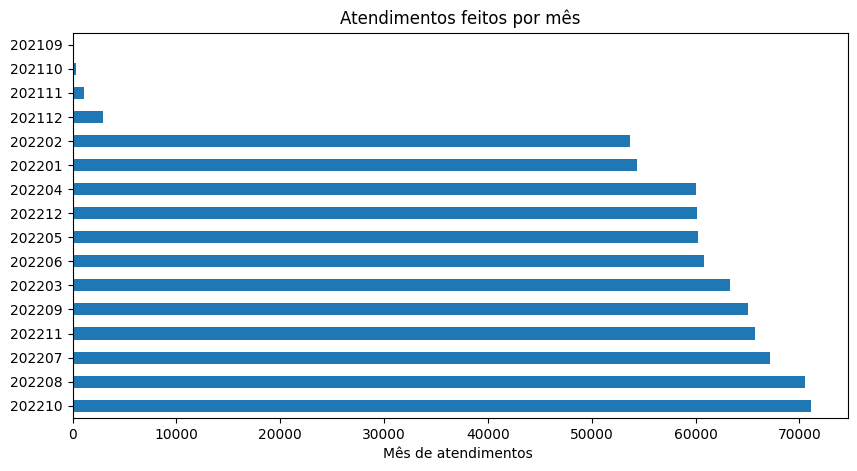

In [12]:
#Conta os atendimentos feitos por mês
df['DT_ATEND'].value_counts().plot(figsize=(10,5),kind='barh')
plt.title('Atendimentos feitos por mês')
plt.xlabel('Mês de atendimentos ')

Podemos Verificar que o mês de outubro de 2022 foi o que teve mais atendimentos iniciados, e que em nos últimos meses de 2021, houveram atendimentos que permaneceram em 2022
Verificaremos o atendimento por sexo.

Text(0.5, 0, 'Sexo')

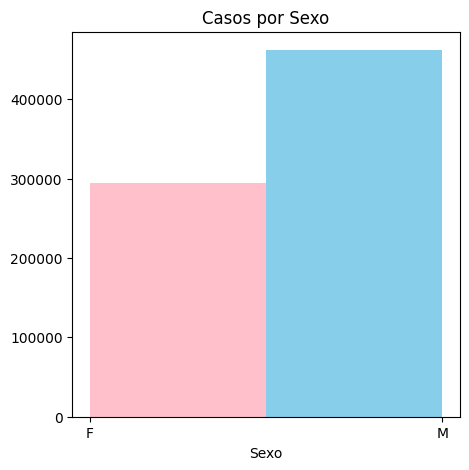

In [13]:
#Casos por Sexo
fig, ax = plt.subplots(figsize=(5,5))
cor = ['pink','skyblue']
ax.hist(df['SEXOPAC'], bins=2)
for i in range(0,2):
    ax.patches[i].set_facecolor(cor[i])
ax.set_title('Casos por Sexo')
ax.set_xlabel('Sexo')

Podemos ver que os homens são os mais propensos a doenças mentais.
<br>
Verificaremos os CIDs mais aparentes, inclusive por sexo.

Text(0.5, 0, 'CID Principal')

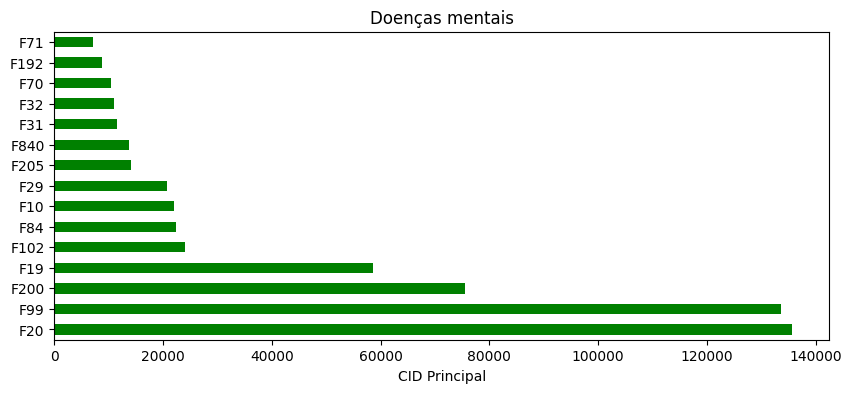

In [14]:
#Verificando os CIDs das Doenças que mais ocorrem nos pacientes
cid_count = df['CIDPRI'].value_counts()
cid_count = cid_count[0:15].plot(figsize=(10,4), kind='barh', facecolor='green') #subplots = True
plt.title('Doenças mentais')
plt.xlabel('CID Principal')

**Top 12 (CID) - Principais Doenças Mentais**

1.   **F20** - Esquizofrenia é uma condição caracterizada por “distorções fundamentais e características do pensamento e da percepção, e por afetos inapropriados ou embotados
2.   **F99** - Transtorno mental não especificado
3.   **F200 **- Esquizofrenia paranóide
4.   **F19** -  Transtornos mentais e comportamentais devidos ao uso de múltiplas drogas e ao uso de outras substâncias psicoativas
5.   **F102** - Transtornos mentais e comportamentais devidos ao uso de álcool  – síndrome de dependência
6.   **F84** - Transtornos globais do desenvolvimento engloba a condição oficialmente denominada Transtorno do Espectro Autista (TEA)
7.   **F10** - Transtornos mentais e comportamentais devidos ao uso de álcool
8.   **F29** -  Psicose não-orgânica não especificada
9.   **F205** - Esquizofrenia residual
10.   **F840** - Autismo infantil
11.   **F31** - Transtorno afetivo bipolar (psicose maníaco-depressiva)
12.   **F32** - Episódios depressivos
13.   **F70** - Retardo mental leve
14.   **F192** - Transtornos mentais e comportamentais devidos ao uso de múltiplas drogas e ao uso de outras substâncias psicoativas
15.   **F71** - Retardo mental moderado


Text(0.5, 0, 'CID Principal')

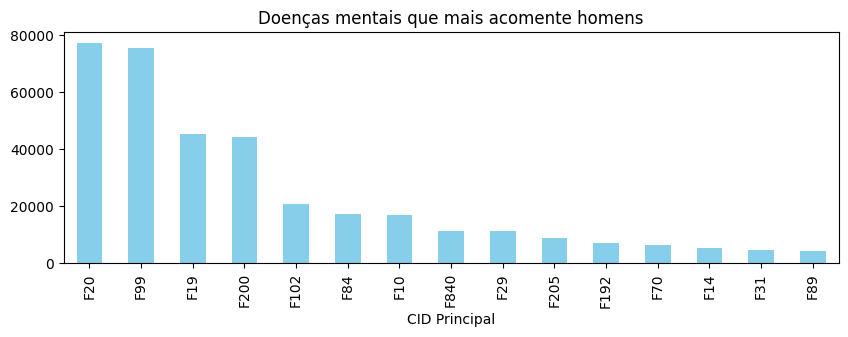

In [15]:
#Verificando os CIDs das Doenças que mais ocorrem nos pacientes homens
cid_masc = masc['CIDPRI'].value_counts()
cid_masc[0:15].plot(figsize=(10,3), kind='bar', facecolor='skyblue')
plt.title('Doenças mentais que mais acomente homens')
plt.xlabel('CID Principal')

Text(0.5, 0, 'CID Principal')

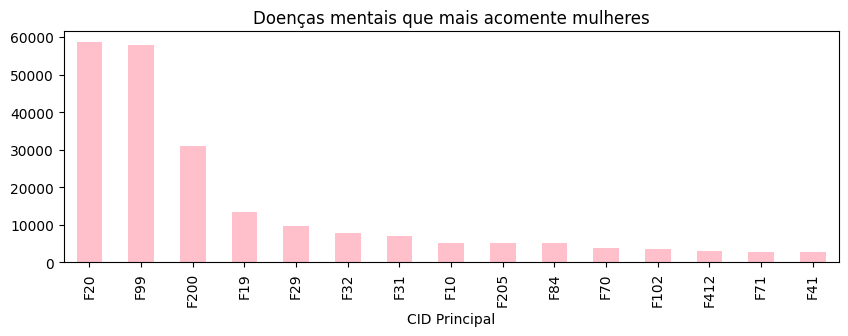

In [16]:
#Verificando os CIDs das Doenças que mais ocorrem nos pacientes mulheres
cid_fem = fem['CIDPRI'].value_counts()
cid_fem[0:15].plot(figsize=(10,3), kind='bar', facecolor='pink')
plt.title('Doenças mentais que mais acomente mulheres')
plt.xlabel('CID Principal')

Text(0.5, 1.0, 'CIDs secundários - Mulheres')

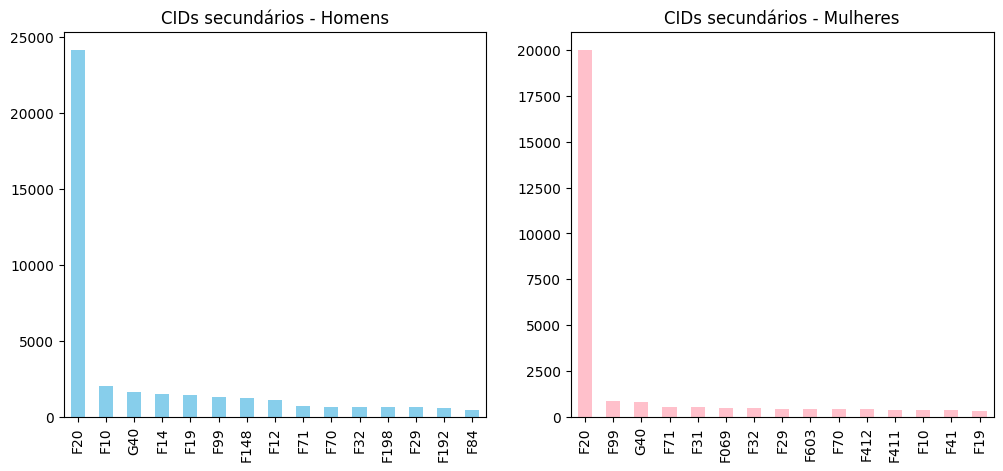

In [17]:
#CIDs secundários das Doenças que mais ocorrem
cid2_masc = masc['CIDASSOC'].value_counts()
cid2_fem = fem['CIDASSOC'].value_counts()

#CIDs secundários
fig, ax = plt.subplots(1,2, figsize = (12, 5)) #facecolor='#B3C7D6'
cid2_masc[0:15].plot(ax=ax[0], kind='bar', facecolor='skyblue')
ax[0].set_title('CIDs secundários - Homens')
cid2_fem[0:15].plot(ax=ax[1], kind='bar', facecolor='pink')
ax[1].set_title('CIDs secundários - Mulheres')

Os *CIDs principais* que mais aparecem pacientes no geral, em homens e em mulheres, os 4 maiores são sempre os mesmos **F20, F99, F200 e F19** apenas alterando a ordem entre eles. Nos *CIDs sencundários* o F20 é o que mais aparece, tendo uma quantidade muito superior aos outros CIDs.<br>
**F20** - Esquizofrenia é uma condição caracterizada por “distorções
fundamentais e características do pensamento e da percepção, e por afetos inapropriados ou embotados
**F99** - Transtorno mental não especificado
**F200** - Esquizofrenia paranóide
**F19** -  Transtornos mentais e comportamentais devidos ao uso de múltiplas drogas e ao uso de outras substâncias psicoativas
<br>
Há diversos CIDs que aparecem que são do mesmo grupo como o F20, F200 e F205 ambos indicam Esquizofrenia, F10 e F102 - Transtornos mentais e comportamentais devidos ao uso de álcool,

Text(0.5, 0, 'Idade')

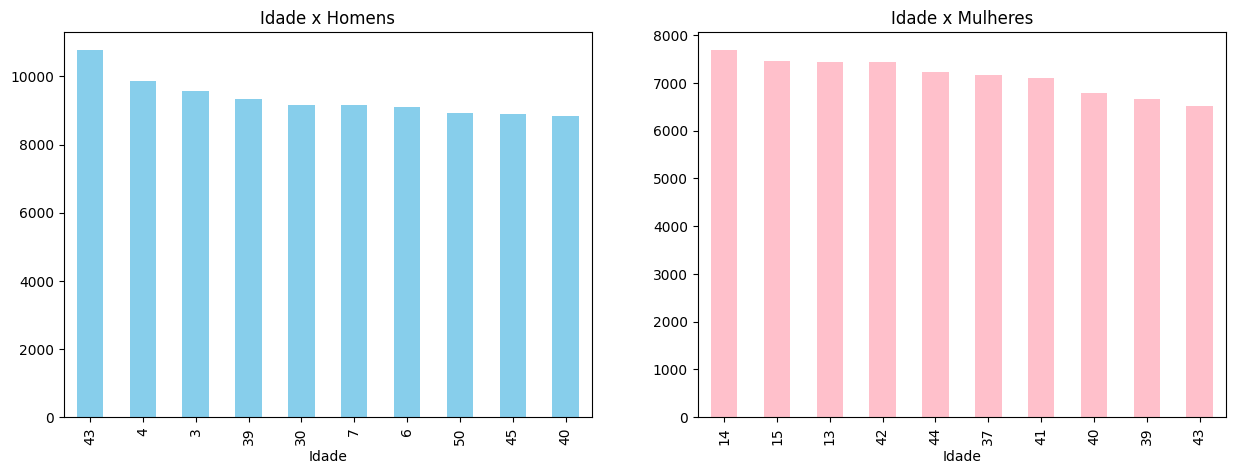

In [18]:
#Idade que mais aparece doenças mentais em homens e mulheres
idade_masc = masc['IDADEPAC'].value_counts()
idade_fem = fem['IDADEPAC'].value_counts()

fig, ax = plt.subplots(1,2, figsize = (15, 5)) #facecolor='#B3C7D6'
idade_masc[0:10].plot(ax=ax[0], kind='bar', facecolor='skyblue')
ax[0].set_title('Idade x Homens')
ax[0].set_xlabel('Idade')
idade_fem[0:10].plot(ax=ax[1], kind='bar', facecolor='pink')
ax[1].set_title('Idade x Mulheres')
ax[1].set_xlabel('Idade')

Enquanto nos homens as doenças aparecem mais próximo aos 40 anos e na infância, as doenças mentais acomentem mais as adolescentes e logo após as mulheres por volta dos 40 anos.<br>
Vamos verificar como é a distribuição por Raça, entre homens e mulheres.

Text(0.5, 1.0, 'Raça x Mulheres')

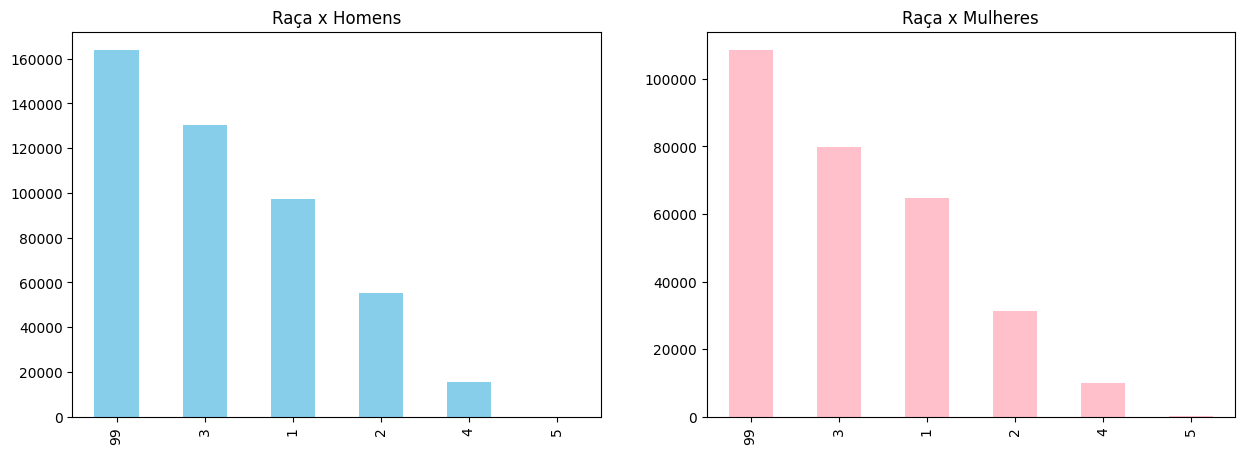

In [19]:
#Raça que mais tem doenças mentais
raca_masc = masc['RACACOR'].value_counts()
raca_fem = fem['RACACOR'].value_counts()

fig, ax = plt.subplots(1,2, figsize = (15, 5)) #facecolor='#B3C7D6'
raca_masc[0:10].plot(ax=ax[0], kind='bar', facecolor='skyblue')
ax[0].set_title('Raça x Homens')
raca_fem[0:10].plot(ax=ax[1], kind='bar', facecolor='pink')
ax[1].set_title('Raça x Mulheres')

A maioria dos casos em ambos os sexos tem a mesma sequência, quando separados por raça. Sendo na ordem: <br>
99 — Sem informação <br>
03 — Parda <br>
01 — Branca <br>
02 — Preta <br>
04 — Amarela <br>
05 — Indígena  <br>

<Axes: >

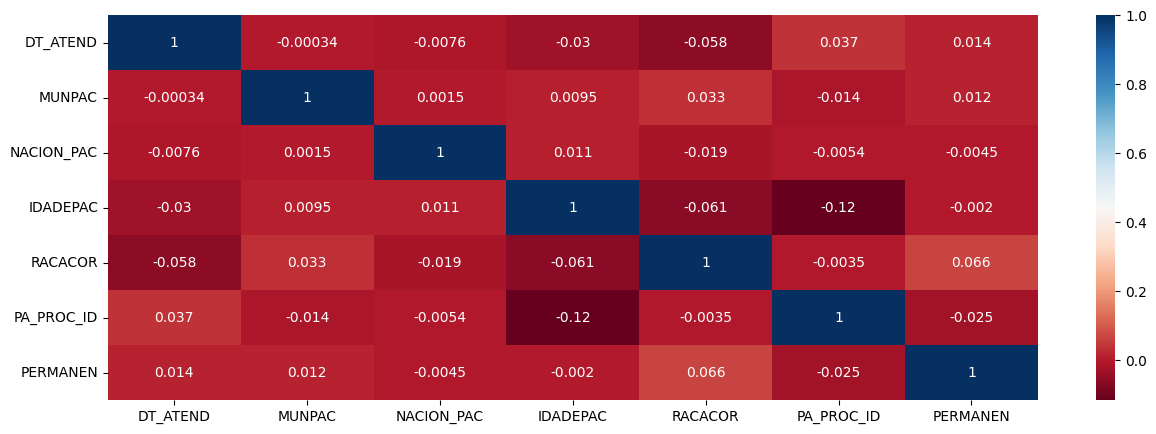

In [20]:
plt.figure(figsize=(15,5))
sns.heatmap(df.drop('DTNASC', axis=1).corr(),annot= True,cmap='RdBu')#cmap='RdBu',cmap='Blues'

Correlação baixa entre os atributos

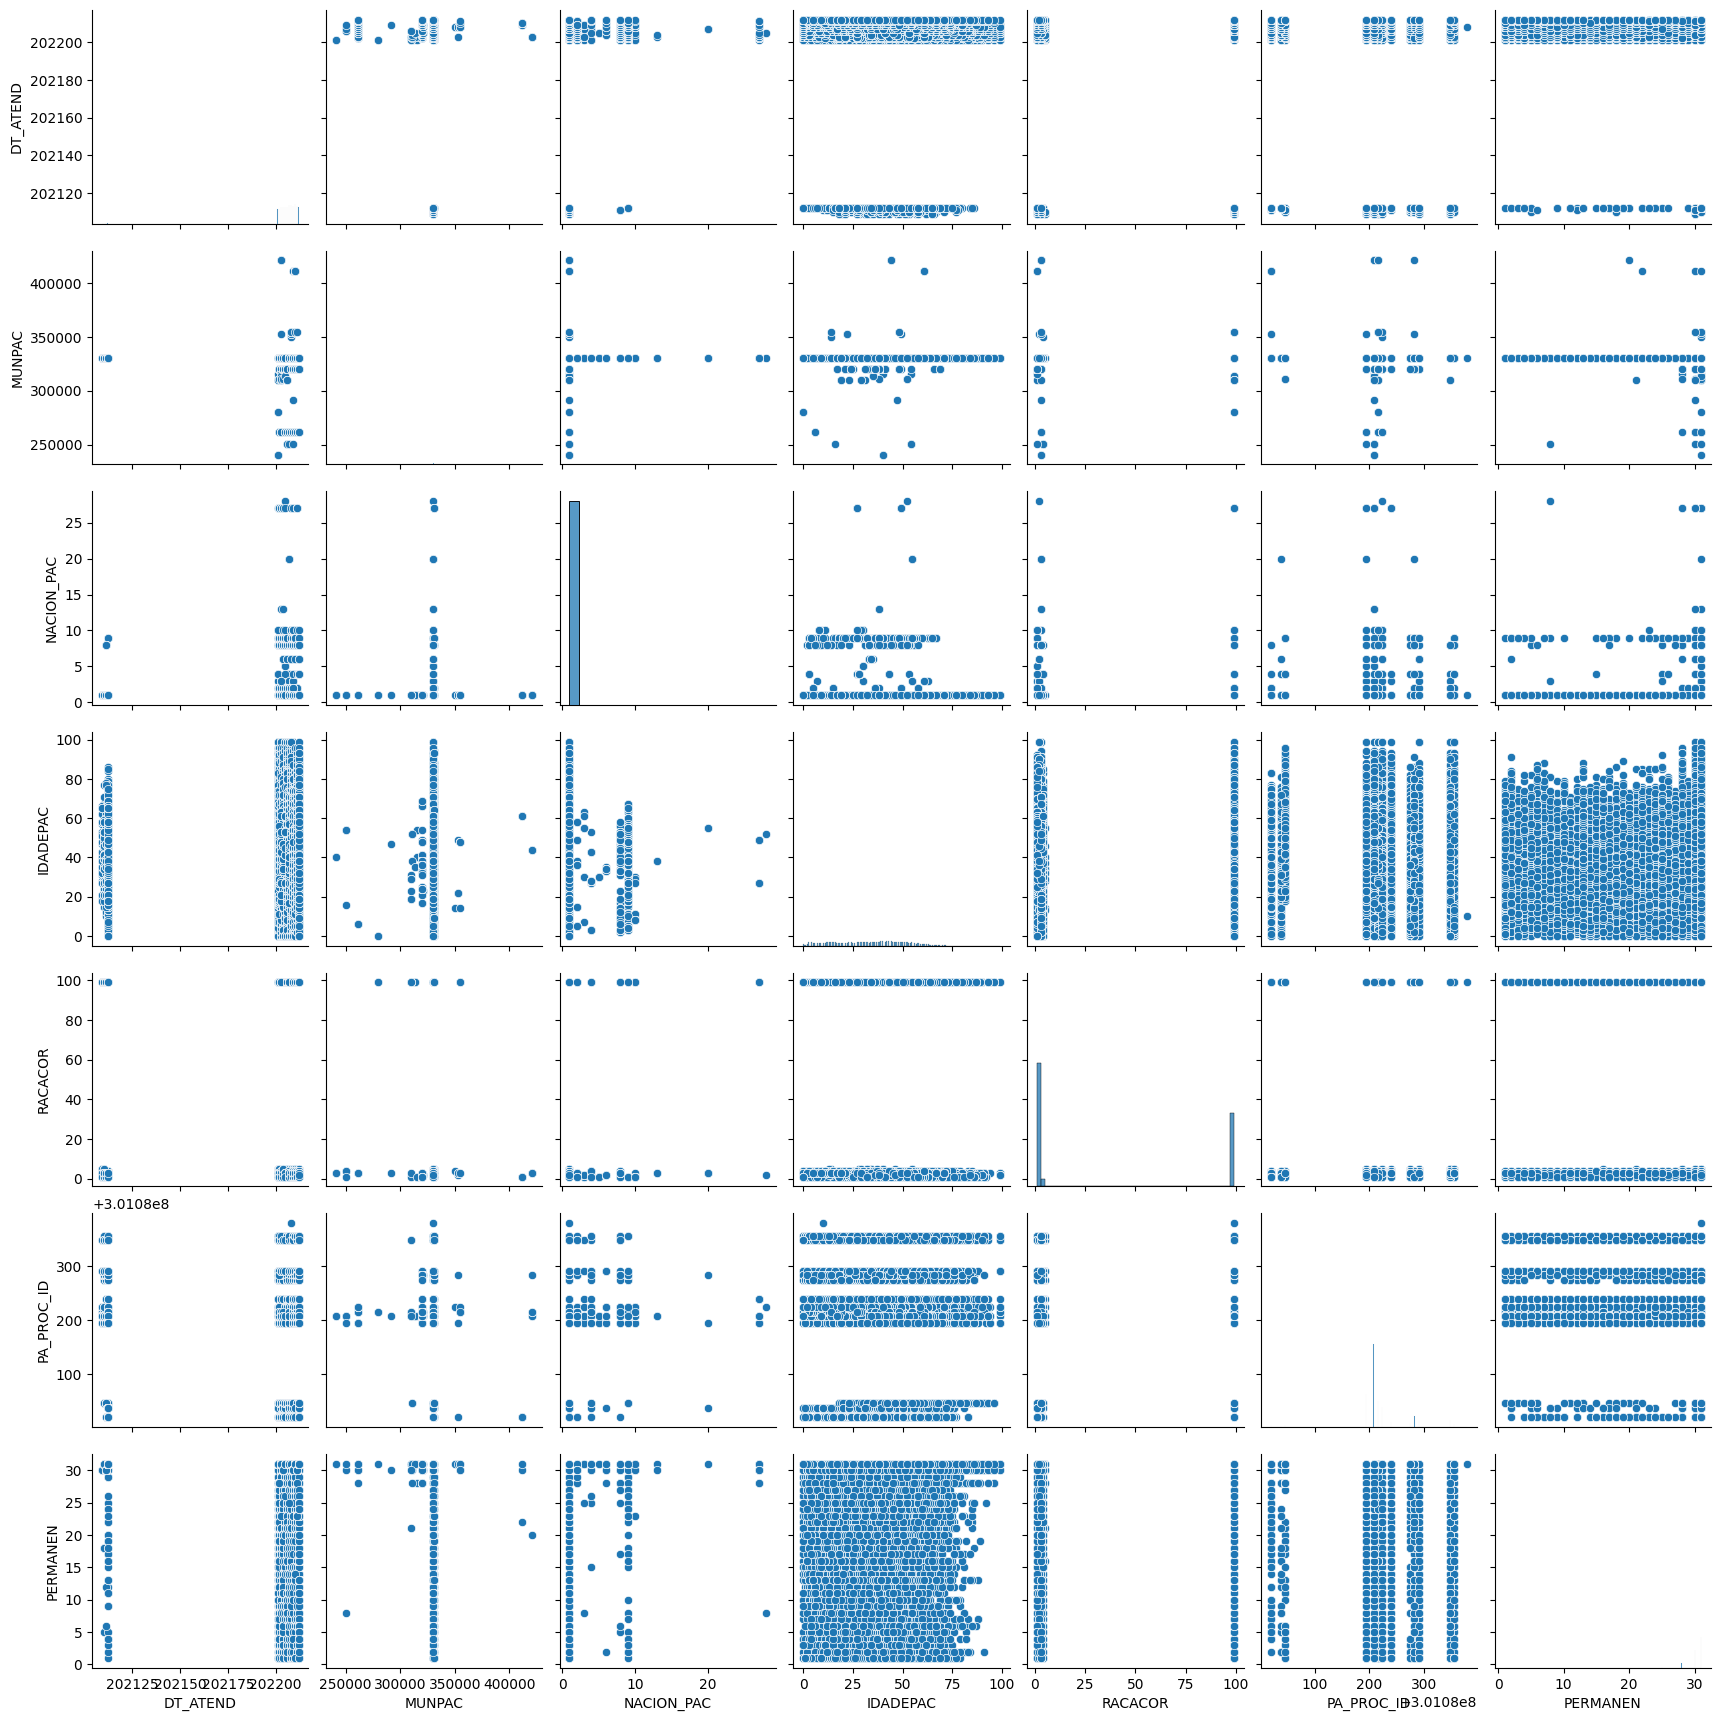

In [21]:
# Matriz de gráficos de dispersão
sns.pairplot(df.drop('DTNASC', axis=1), diag_kind='hist', height=2.5)

# exibe a plotagem
plt.show()

## 4 - Pré-Processamento de dados

### 4.1. Tratamento de Missings e Limpeza

In [22]:
# Deletar as colunas que não serão usadas para a predição
df = df.drop(['DT_ATEND','MUNPAC','NACION_PAC','DTNASC','LOC_REALIZ','CIDASSOC'], axis=1)

Retirada de atributos que não serão utilizados na ML.<br><br>
Abaixo irei verificar e tratar os Nulos do dataframe.

<Axes: >

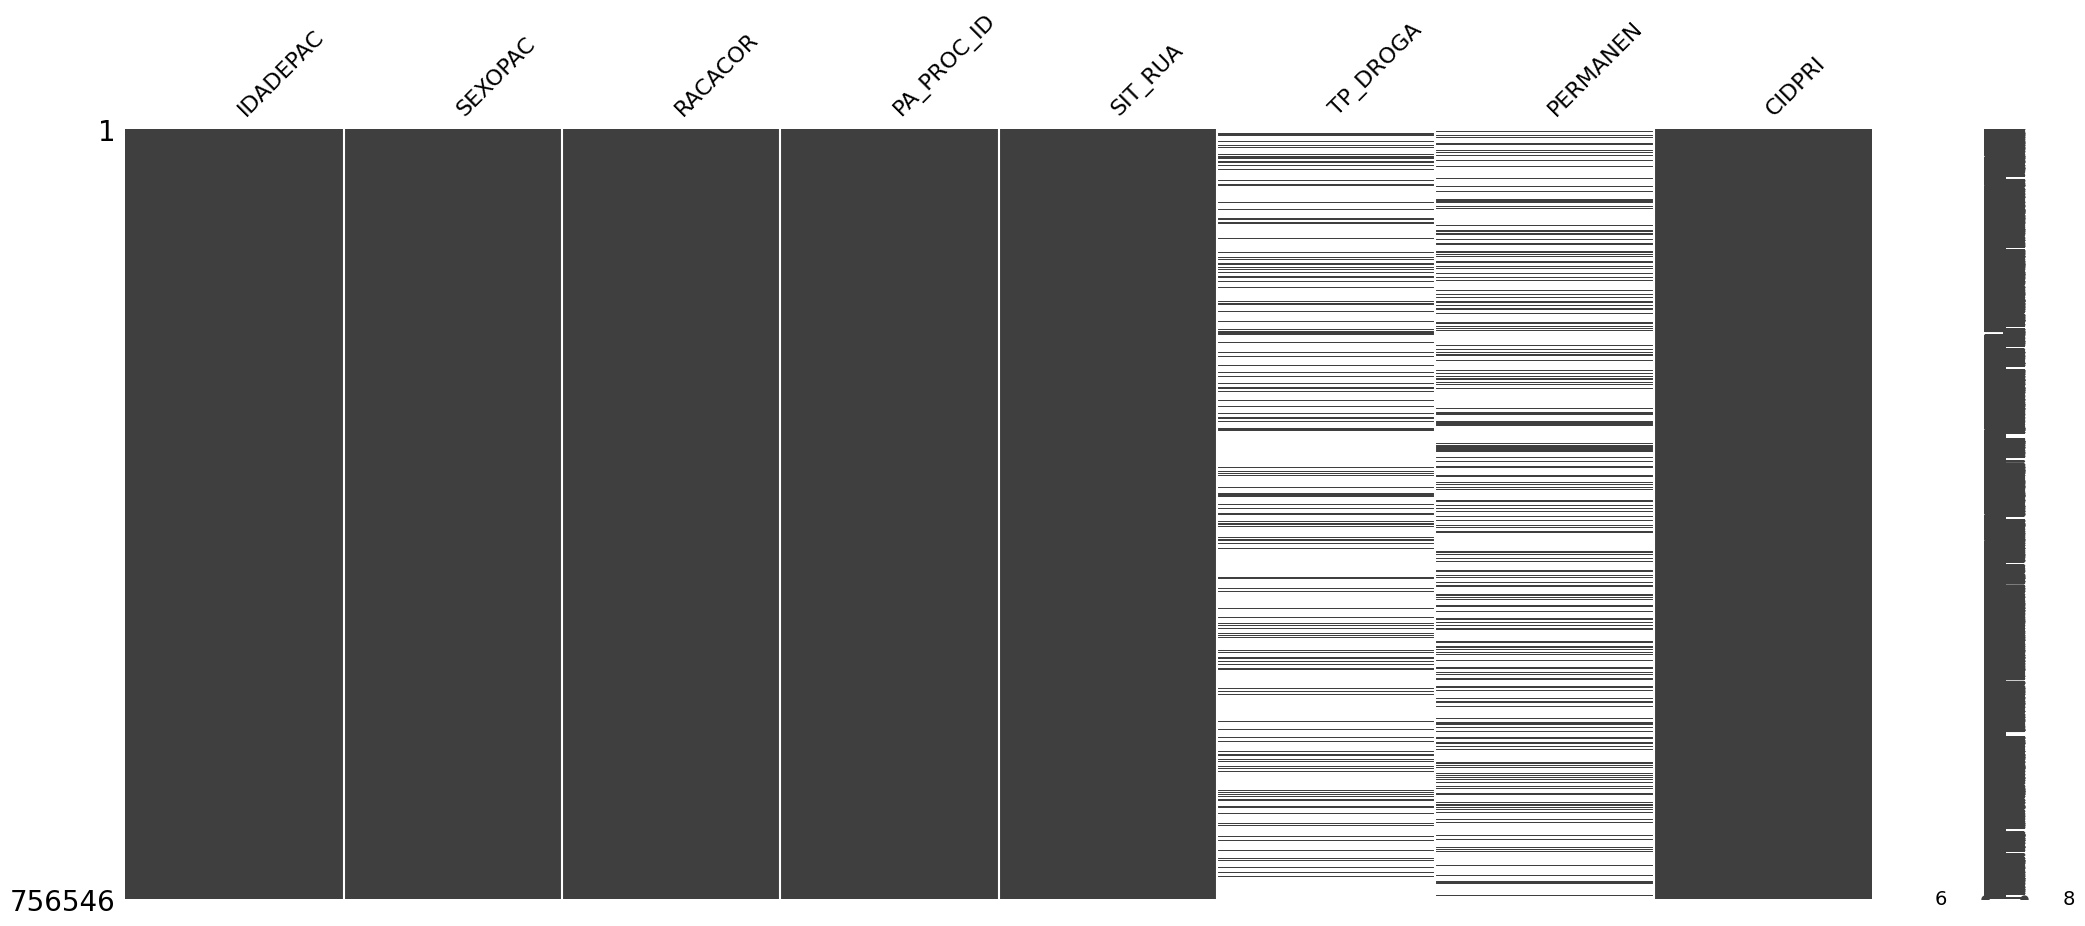

In [23]:
# exibindo visualização matricial da nulidade do dataset
ms.matrix(df)

In [24]:
#Verificar todos os valores nulos do DF
print('Valores Nulos')
df.isnull().sum()

Valores Nulos


IDADEPAC           0
SEXOPAC            0
RACACOR            0
PA_PROC_ID         0
SIT_RUA            0
TP_DROGA      608291
PERMANEN      545363
CIDPRI             0
dtype: int64

Podemos verificar que os atributos TP_DROGA e PERMANEN têm alto indice de nulos, que serão tratados.<br>

Coeçando pelo TP_DROGA, vemos que há um valor que já está no DF, porém aparece com espaço e iremos modificar para ter o valor correto. Para os nulos de TP_DROGA (608291) iremos trocar pelo valor N, que significa que não foi utilizada nenhuma droga por este paciente.

Text(0.5, 0, 'Tipo de Drogas')

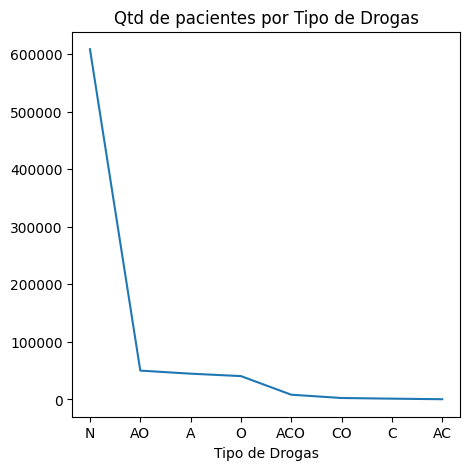

In [25]:
#Substituir os valores da errados e faltantes do atributo TIPO DE DROGA
df['TP_DROGA'].replace({'A O': "AO"}, inplace = True)
df['TP_DROGA'].fillna('N', inplace = True)
df['TP_DROGA'].value_counts().plot(figsize=(5,5), kind='line')
plt.title('Qtd de pacientes por Tipo de Drogas')
plt.xlabel('Tipo de Drogas')

Para o atributo PERMANEN, com 545363 nulos, iremos trocar os nulos por O, que indica que o paciente não permaneceu internado.

In [26]:
# Conta do tributo Permanência em Atendimento, por quantidade de dias
df['PERMANEN'].fillna(0, inplace = True)
df['PERMANEN'].value_counts()

0.0     545363
31.0    115465
30.0     65682
28.0     16139
25.0      1078
24.0       806
29.0       739
27.0       676
22.0       600
18.0       583
26.0       558
23.0       550
13.0       530
19.0       524
1.0        521
15.0       513
21.0       489
20.0       480
11.0       469
14.0       426
12.0       412
17.0       409
16.0       396
8.0        390
6.0        359
7.0        357
10.0       347
4.0        344
9.0        340
5.0        339
2.0        337
3.0        325
Name: PERMANEN, dtype: int64

In [27]:
df.select_dtypes(include='object').describe()

,SEXOPAC,SIT_RUA,TP_DROGA,CIDPRI
count,756546,756546,756546,756546
unique,2,2,8,507
top,M,N,N,F20
freq,462022,743909,608291,135703


Verificamos que há 4 colunas do tipo object, ou seja, não numérico, e a maioria dos algoritmos de ML, não funcionam com esse tipo de dado.<br>
Desta forma, iremos trocar os valores que aparece nos atributos, sendo:<br>
<br>
SEXOPAC - M= 0, F= 1 <br>
SIT_RUA - N= 0, S= 1 <br>
TP_DROGA - N= 0, A= 1, C= 2, O=3, AC= 4, AO= 5, CO= 6, ACO= 7 <br>
CIDPRI - F10 e F102= 1, F19= 2, F20= 3, F200 e F205= 3, F29= 4, F31= 5, F32= 6, F70= 7, F84 e F840 =8, F99= 9. Esses foram escolhido por serem os CIDs de maior incidência. Os CIDs do mesmo grupo como F10 e F102 foram agrupados por serem diagnósticos da mesma doença, porém com algum grau de diferença. <br>
Os valores de CIDPRI, que não estiverem no dicionário acima serão excluídos para facilitar a análise, pois são mais de 500 CIDs diferentes.

In [29]:
#Ajustes necessários para o DF para que seja possível usar ML
df['SEXOPAC'].replace({'M': 0,'F': 1}, inplace = True)
df['SIT_RUA'].replace({'N': 0,'S': 1}, inplace = True)
df['TP_DROGA'].replace({'N': 0,'A': 1,'C': 2,'O':3,'AC':4,'AO':5,'CO': 6,'ACO':7}, inplace = True)
df['CIDPRI'].replace({'F10':1,'F102':1,'F19': 2,'F20': 3,'F200': 3,'F205':3,'F29':4,'F31':5,'F32':6,'F70':7,'F84':8,'F840':8,'F99': 9}, inplace = True)
df['CIDPRI'] = pd.to_numeric(df['CIDPRI'],downcast='integer', errors='coerce') # Transforma o atributo CIDPRI em numerico
df.dropna(inplace = True)
df['CIDPRI'] = df['CIDPRI'].astype(int)

#astype(np.uint32)
#df['CIDPRI'] = df['CIDPRI'].apply(pd.to_numeric, downcast='integer', errors='coerce')
#df['CIDPRI'].fillna(0, inplace = True)
#df = df.astype(integer)

'''
# Agrupando frequencia
fq = df.groupby('CIDPRI').size()/len(df)
# Mapeando os valores do df
df.loc[:, "{}_fq".format('CIDPRI')] = df['CIDPRI'].map(fq)
# apagando coluna original
df = df.drop(['CIDPRI'], axis = 1)
'''

'\n# Agrupando frequencia\nfq = df.groupby(\'CIDPRI\').size()/len(df)\n# Mapeando os valores do df\ndf.loc[:, "{}_fq".format(\'CIDPRI\')] = df[\'CIDPRI\'].map(fq)\n# apagando coluna original\ndf = df.drop([\'CIDPRI\'], axis = 1)\n'

In [30]:
df.head(10)

,IDADEPAC,SEXOPAC,RACACOR,PA_PROC_ID,SIT_RUA,TP_DROGA,PERMANEN,CIDPRI
0,45,1,4,301080208,0,1,31.0,1
1,33,1,2,301080208,0,0,31.0,9
2,46,0,4,301080208,0,1,31.0,1
3,46,0,4,301080208,0,1,0.0,1
4,45,1,4,301080208,0,1,0.0,1
5,45,1,4,301080208,0,1,0.0,1
6,45,0,1,301080208,0,0,31.0,1
7,23,0,3,301080208,0,1,31.0,1
8,52,1,3,301080208,0,0,31.0,3
9,23,0,3,301080208,0,1,0.0,1


### 4.2 - Separação de conjunto de teste e treino

---



Os dados serão divididos em entrada e saída para aplicação do algoritmo de Padronização e depois dividido em treino e teste, além de ser aplicado o algoritmo de validação cruzada (Kfold).

In [31]:
# Preparação dos dados

# Separação em bases de treino e teste (holdout)
X = df.values[:,0:7] # atributos #6
y = df.values[:,7:] # classe (target)

# Gerando nova escala (Normalizando)
#scaler = MinMaxScaler(feature_range = (0,1))
#encodeX = scaler.fit_transform(X)

#Sumarizando os dados Transformados
#print('Dados Originais: \n\n', df.values)
#print('\nDados Normalizados: \n\n', encodeX[0:5,:])


#Padronização
scaler = StandardScaler().fit(X)
encodeX = scaler.transform(X)

#Sumarizando os dados Padronizados
print('Dados Originais: \n\n', df.values)
print('\nDados Padronizados: \n\n', encodeX[0:5,:])

print(X)
X_treino, X_teste, Y_treino, Y_teste = train_test_split(encodeX, y, test_size=0.2, random_state=7) # faz a divisão
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7) # faz a divisão

# Criando os folds para a validação cruzada
num_particoes = 10 # número de folds da validação cruzada
random_state= 7
kfold = KFold(num_particoes, shuffle=True, random_state=random_state) # faz o particionamento em 10 folds
print(kfold)

Dados Originais: 

 [[45.  1.  4. ...  1. 31.  1.]
 [33.  1.  2. ...  0. 31.  9.]
 [46.  0.  4. ...  1. 31.  1.]
 ...
 [32.  1.  1. ...  0. 31.  3.]
 [38.  1.  3. ...  0. 31.  3.]
 [38.  1.  2. ...  0. 31.  3.]]

Dados Padronizados: 

 [[ 0.67147247  1.27571529 -0.71945116 -0.25832933 -0.13783242  0.22011849
   1.69641347]
 [-0.00854096  1.27571529 -0.76239448 -0.25832933 -0.13783242 -0.41253423
   1.69641347]
 [ 0.72814026 -0.78387397 -0.71945116 -0.25832933 -0.13783242  0.22011849
   1.69641347]
 [ 0.72814026 -0.78387397 -0.71945116 -0.25832933 -0.13783242  0.22011849
  -0.61354239]
 [ 0.67147247  1.27571529 -0.71945116 -0.25832933 -0.13783242  0.22011849
  -0.61354239]]
[[45.  1.  4. ...  0.  1. 31.]
 [33.  1.  2. ...  0.  0. 31.]
 [46.  0.  4. ...  0.  1. 31.]
 ...
 [32.  1.  1. ...  0.  0. 31.]
 [38.  1.  3. ...  0.  0. 31.]
 [38.  1.  2. ...  0.  0. 31.]]
KFold(n_splits=10, random_state=7, shuffle=True)


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 553756 entries, 0 to 756545
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   IDADEPAC    553756 non-null  int64  
 1   SEXOPAC     553756 non-null  int64  
 2   RACACOR     553756 non-null  int64  
 3   PA_PROC_ID  553756 non-null  int64  
 4   SIT_RUA     553756 non-null  int64  
 5   TP_DROGA    553756 non-null  int64  
 6   PERMANEN    553756 non-null  float64
 7   CIDPRI      553756 non-null  int64  
dtypes: float64(1), int64(7)
memory usage: 38.0 MB


## 5 - Treinamento

Foram realizados diversos testes para a base utilizando diversos modelos, e pude verificar que os modelos de Classificação se encaixam mais na proposta , desta forma, foram selecionados diversos algoritmos de classificação para treinamento.
Será mostrado as medidas de MSE e RMSE, além de plotado um boxplot, para verificar qual o algoritmo é o melhor para o caso.

RF: MSE 0.68 (0.00) - RMSE 0.83
EXT: MSE 0.68 (0.00) - RMSE 0.83
KNNC: MSE 0.65 (0.00) - RMSE 0.81
NB: MSE 0.49 (0.00) - RMSE 0.70


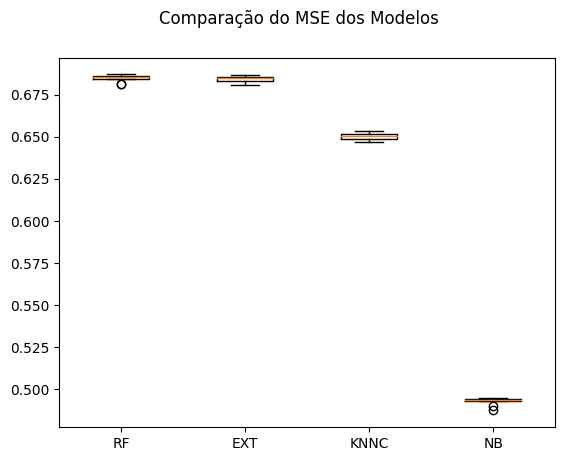

In [33]:
# Modelagem

# Definindo uma seed global para esta célula de código
np.random.seed(7)

# Listas para armazenar os modelos, os resultados e os nomes dos modelos
models = []
results = []
names = []

# Preparando os modelos e adicionando-os em uma lista
models.append(('RF',RandomForestClassifier()))
models.append(('EXT',ExtraTreesClassifier()))
models.append(('KNNC',KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
#models.append(('SVM', SVR(kernel='poly')))
#models.append(('LR', LinearRegression()))
#models.append(('KNNR', KNeighborsRegressor()))
#models.append(('CART', DecisionTreeRegressor()))
#models.append(('RFR',RandomForestRegressor()))
#models.append(('EXT',ExtraTreesRegressor()))
#models.append(('NBM', MultinomialNB()))

# Avaliando um modelo por vez
for name, model in models:

  cv_results = cross_val_score(model, X_treino, Y_treino, cv=kfold)
  results.append(cv_results)
  names.append(name)
  # imprime MSE, desvio padrão do MSE e RMSE dos 10 resultados da validação cruzada
  msg = "%s: MSE %0.2f (%0.2f) - RMSE %0.2f" % (name, abs(cv_results.mean()), cv_results.std(), np.sqrt(abs(cv_results.mean())))
  print(msg)
  #accuracy = accuracy_score(Y_treino, Y_teste)
  #print("Accuracia:", accuracy)

# Boxplot de comparação dos modelos
fig = plt.figure()
fig.suptitle('Comparação do MSE dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## 6 - Teste

Será realizado o teste com a base de teste para verificar nova acurácia do algoritmo escolhido. Como houve um empate será executada a rodada de testes nos algoritmos Random Forest e Extra Trees.

In [34]:
 # Criando um modelo com todo o conjunto de treino
model = RandomForestClassifier()
model.fit(X_treino, Y_treino)

# Fazendo as predições com o conjunto de teste
predictions = model.predict(X_teste)

# Estimando a acurácia no conjunto de teste
print(accuracy_score(Y_teste, predictions))

0.6860192140999711


In [35]:
 # Criando um modelo com todo o conjunto de treino
model = ExtraTreesClassifier()
model.fit(X_treino, Y_treino)

# Fazendo as predições com o conjunto de teste
predictions = model.predict(X_teste)

# Estimando a acurácia no conjunto de teste
print(accuracy_score(Y_teste, predictions))

0.6856761051719157


Ambos os algoritmos tiveram uma acurácia parecida, sendo o algoritimo RF um pouco melhor, porém a acurácia de ambos não foi satisfatória para uma implementação real.